In [1]:
import pandas as pd
import numpy as np
import os
import altair as alt
import matplotlib.pyplot as plt
from IPython.display import Image
import nbconvert

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

In [2]:
# Importing the dataset
ds = pd.read_csv('UKPN-LCL-smartmeter-sample.csv')

In [ ]:
ds

In [3]:
# Confirming the attribute names
ds_columns = ds.columns.tolist()
for i in ds_columns:
    print(i)

LCLid
stdorToU
DateTime
KWH/hh (per half hour) 
Acorn
Acorn_grouped


In [ ]:
#result = ds
#result['date'] = pd.to_datetime(result['DateTime'])
#ds = result.loc[:, ['KWH/hh (per half hour) ']]
#ds = ds.set_index(result.ds)

ds.plot()

In [4]:
ds['DateTime'] = pd.to_datetime(ds['DateTime'])
ds['KWH/hh (per half hour) '] = pd.to_numeric(ds['KWH/hh (per half hour) '], downcast = 'float', errors = 'coerce')

In [5]:
#ds = ds.loc[:, ['KWH/hh (per half hour) ']]
#ds = ds.set_index(ds.date)
ds.set_index('DateTime', inplace=True) #If you do this, does not work with Altair

In [6]:
ds_columns

['LCLid',
 'stdorToU',
 'DateTime',
 'KWH/hh (per half hour) ',
 'Acorn',
 'Acorn_grouped']

In [7]:
# Dropping the index attribute and the un-normalized continuous numeric values from phase 1
ds = ds.drop(['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped'], axis=1)

In [8]:
# Confirming the attribute names
ds_columns = ds.columns.tolist()
for i in ds_columns:
    print(i)

KWH/hh (per half hour) 


In [126]:
from altair import pipe, limit_rows, to_values
t = lambda data: pipe(data, limit_rows(max_rows=20000), to_values)
alt.data_transformers.register('custom', t)
alt.data_transformers.enable('custom')

DataTransformerRegistry.enable('custom')

In [ ]:
#ds
#alt.data_transformers.disable_max_rows()
#ds.plot()
#alt.Chart(ds)
#ds.show()
# Plotting the results
alt.Chart(ds).mark_line().encode(
    x='DateTime',
    y='KWH/hh (per half hour) '
)

In [86]:
ds.to_json('ds.json', orient='records')

In [142]:
weekly = ds.resample('w').sum()

In [9]:
#ds.index = pd.to_datetime(ds.index, unit='w')
ds.index

DatetimeIndex(['2012-10-17 13:00:00', '2012-10-17 13:30:00',
               '2012-10-17 14:00:00', '2012-10-17 14:30:00',
               '2012-10-17 15:00:00', '2012-10-17 15:30:00',
               '2012-10-17 16:00:00', '2012-10-17 16:30:00',
               '2012-10-17 17:00:00', '2012-10-17 17:30:00',
               ...
               '2013-10-15 19:30:00', '2013-10-15 20:00:00',
               '2013-10-15 20:30:00', '2013-10-15 21:00:00',
               '2013-10-15 21:30:00', '2013-10-15 22:00:00',
               '2013-10-15 22:30:00', '2013-10-15 23:00:00',
               '2013-10-15 23:30:00', '2013-10-16 00:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=17458, freq=None)

In [145]:
#ds.index = ds
ds
ds.to_csv('ds.csv')

In [ ]:

from pandas import Series
from matplotlib import pyplot
series = pd.read_csv('ds.csv')
series
#series.set_index('DateTime', inplace=True)
series.plot()
pyplot.show()
#ds.plot()
#plt.show()

In [20]:
ds.rename(columns={'KWH/hh (per half hour) ':'value'}, inplace=True)

VERY GOOD
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

Convert the integer timestamps in the index to a DatetimeIndex:
https://stackoverflow.com/questions/30857680/pandas-resampling-error-only-valid-with-datetimeindex-or-periodindex

In [11]:
# For time series in plt, the date / datetime should be an INDEX
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

In [ ]:
df

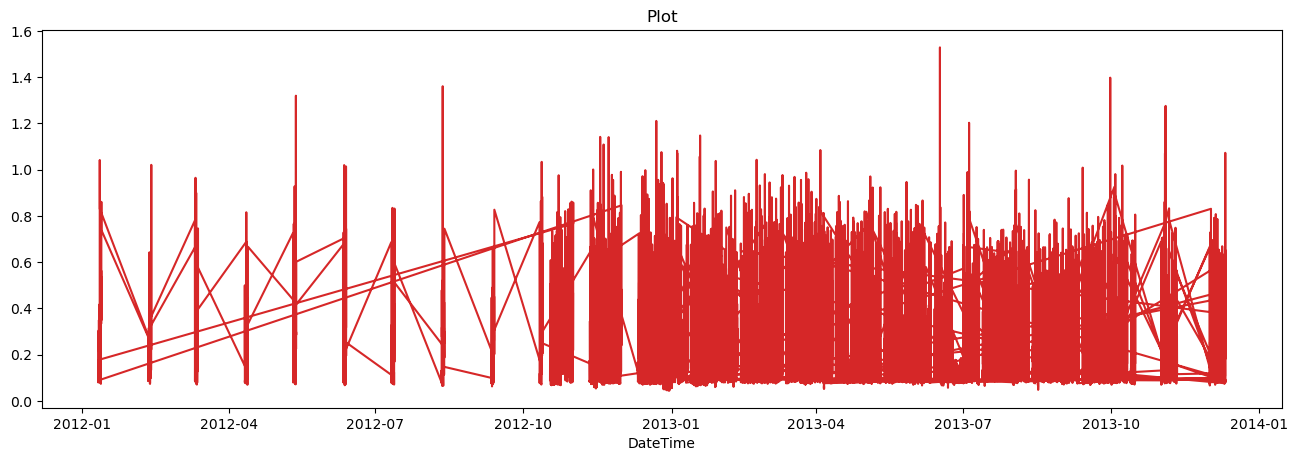

In [22]:
# Draw Plot
def plot_ds(ds, x, y, title = "", xlabel = 'DateTime', ylabel = '', dpi = 100):
    plt.figure(figsize = (16,5), dpi = dpi)
    plt.plot(x, y, color = 'tab:red')
    plt.gca().set(title = title, xlabel = xlabel, ylabel = ylabel)
    plt.show()

plot_ds(ds, x = ds.index, y = ds.value, title = 'Plot')   
# Now just need to collapse this down into months